In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sibling_directory = os.path.join(parent_directory,'data')

In [52]:
processed_directory = os.path.join(sibling_directory, 'processed')
feather_file_path1 = os.path.join(processed_directory, 'icu_chartevents_timeseries_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')
feather_file_path2 = os.path.join(processed_directory, 'icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')
#df1 = feather.read_dataframe(feather_file_path1)
df1 = pd.read_feather(feather_file_path1)
df1 = df1[['abs_event_time', 'stay_id', 'Temperature Celsius']]
#df2= feather.read_dataframe(feather_file_path2)
df2= pd.read_feather(feather_file_path2)
df2 = df2[['subject_id', 'stay_id']]
merged_df = pd.merge(df1, df2, on='stay_id')
merged_df['abs_event_time'] = pd.to_datetime(merged_df['abs_event_time'])
#print(merged_df.columns)

In [53]:
temperature_values = merged_df['Temperature Celsius'].values
stay_id_values = merged_df['subject_id'].values
time_values = merged_df['abs_event_time'].values
subject_values = merged_df['subject_id'].values
#print("Temperature in Celsius:", temperature_values)
#print("Subject ID Values:", subject_values)
#print("Time Values:", time_values)
#grouped_df = merged_df.groupby('subject_id')
grouped_df = merged_df.groupby(['subject_id', 'stay_id'])

#grouped_readings = grouped_df[['abs_event_time', 'Temperature Celsius']].apply(list).to_dict()
#grouped_readings = merged_df.groupby('subject_id').agg({'abs_event_time': list, 'Temperature Celsius': list}).to_dict()
#grouped_readings = merged_df.groupby('subject_id').agg({'abs_event_time': list, 'Temperature Celsius': list}).to_dict(orient='index')
# Group the DataFrame by both 'subject_id' and 'stay_id' and aggregate columns into lists
#grouped_readings = merged_df.groupby(['subject_id', 'stay_id']).agg({'abs_event_time': list, 'Temperature Celsius': list}).to_dict(orient='index')
grouped_readings = {}

# Group the DataFrame first by 'subject_id' and then by 'stay_id'
grouped_df = merged_df.groupby(['subject_id', 'stay_id'])

# Iterate over each group
for (subject_id, stay_id), group_df in grouped_df:
    # Check if the subject_id is already in the grouped_readings dictionary
    if subject_id not in grouped_readings:
        # If not, create a new dictionary for the subject_id
        grouped_readings[subject_id] = {}
    # Store the data associated with the stay_id in the dictionary for the subject_id
    grouped_readings[subject_id][stay_id] = {
        'abs_event_time': group_df['abs_event_time'].tolist(),
        'Temperature Celsius': group_df['Temperature Celsius'].tolist()
    }


keys = grouped_readings.keys()
#print(keys)
#print(grouped_readings)

In [54]:
random_group_subject_id = random.choice(list(grouped_readings.keys()))
#print('random_group_subject_id',random_group_subject_id)
random_group_readings = grouped_readings[random_group_subject_id]
#print('random_group_subject_id', random_group_readings)
random_group_subject_id = random.choice(list(grouped_df.groups.keys()))
#print('random_group_subject_id',random_group_subject_id)
random_group_df = grouped_df.get_group(random_group_subject_id)
#print('random_group_df',random_group_df)

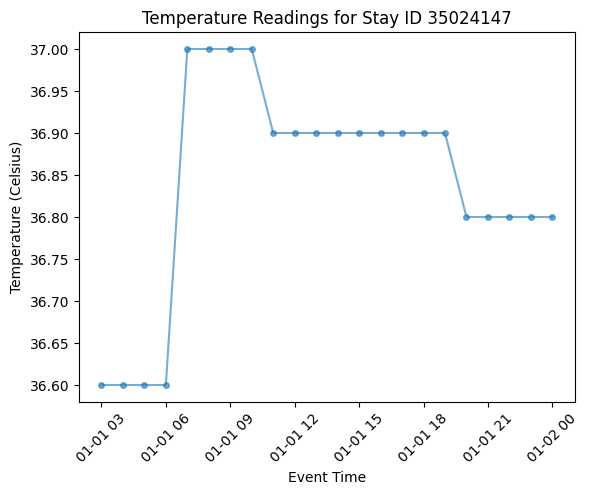

<Figure size 1600x600 with 0 Axes>

In [55]:
# Plot temperature readings against absolute event times for the random group
plt.plot(random_group_df['abs_event_time'], random_group_df['Temperature Celsius'], marker='o', linestyle='-', markersize=4, alpha=0.6)
plt.title(f'Temperature Readings for Stay ID {random_group_subject_id[1]}')
plt.xlabel('Event Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.figure(figsize=(16, 6))
#plt.grid(True)
plt.tight_layout()
plt.show()